In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


a. Import the data set

In [2]:
train = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


b. Store the split data into separate variables.

In [5]:
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

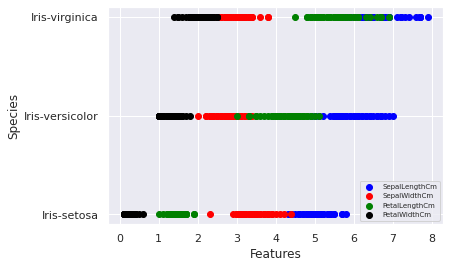

In [6]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = train.loc[:, 'SepalLengthCm']
pltY = train.loc[:, 'Species']
plt.scatter(pltX,pltY, color='blue', label = 'SepalLengthCm')

pltX = train.loc[:, 'SepalWidthCm']
pltY = train.loc[:, 'Species']
plt.scatter(pltX,pltY, color='red', label = 'SepalWidthCm')

pltX = train.loc[:, 'PetalLengthCm']
pltY = train.loc[:, 'Species']
plt.scatter(pltX,pltY, color='green', label = 'PetalLengthCm')

pltX = train.loc[:, 'PetalWidthCm']
pltY = train.loc[:, 'Species']
plt.scatter(pltX,pltY, color='black', label = 'PetalWidthCm')

plt.legend(loc=4, prop={'size':7})
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

c. Create a naive Bayes model on the training dataset

In [9]:
from sklearn.naive_bayes import GaussianNB

In [10]:
gnb = GaussianNB()

#Fitting the model

In [11]:
gnb.fit(x_train, y_train)

GaussianNB()

d. Now predict the data model for a testing dataset that you have separated in bit b.

In [12]:
y_pred = gnb.predict(x_test)

In [13]:
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


In [14]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Species, dtype: object

In [15]:
from sklearn import metrics

In [16]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
